# Convert pictures for Cifar10
This function takes a filename as a string, cropping boundaries Left Right Bottom Top which default to [0 1 0 1], for example a wide rectangle picture with a cat on the left hand side might need the right hand 20% cropping off so set lrbt = [0,0.8,0,1]. The final argument is the blur applied to the picture before downsampling, high blur smudges the picture a lot, low blue pixelates it a lot.

In [155]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def cifarise(filename='cat.jpg',lrbt=[0,1,0,1],blur=1):
    img=mpimg.imread(filename)
    r=img[:,:,0]
    g=img[:,:,1]
    b=img[:,:,2]
    
    def kde(x,D,blur):
        delta=np.linspace(-4*blur,4*blur,int(blur)*8+1)

        dx0 = np.round(x[0] + delta).astype('int')
        dx0 = dx0[(dx0>=0) & (dx0<D.shape[0]) ] 

        dx1 = np.round(x[1] + delta).astype('int')
        dx1 = dx1[(dx1>=0) & (dx1<D.shape[1]) ]

        b2=-0.5/blur/blur

        total=0
        for i1 in dx1:
            total += sum(D[dx0,i1]*np.exp(b2*((x[0]-dx0)**2 + (x[1]-i1)**2)) )
        return(total)

    x0=r.shape[0]*np.linspace(1-lrbt[1]+1/32 ,1-lrbt[0] - 1/32 , 32)
    x1=r.shape[1]*np.linspace(lrbt[2]+1/32 ,lrbt[3] - 1/32 , 32)
    x0=np.round(x0)
    x1=np.round(x1)

    outputr=np.zeros((32,32))
    outputg=np.zeros((32,32))
    outputb=np.zeros((32,32))

    for i in np.arange(32,dtype='int'):
        for j in np.arange(32,dtype='int'):
            outputr[i,j]=kde([x0[i],x1[j]],r,blur)
            outputg[i,j]=kde([x0[i],x1[j]],g,blur)
            outputb[i,j]=kde([x0[i],x1[j]],b,blur)

    op = np.max([outputr.max(),outputg.max(),outputb.max()])
    rgbt=img.max()/op

    output=np.round(rgbt*np.dstack([outputr , outputg ,outputb  ])).astype('uint8')
    plt.subplot(1,2, 1)
    plt.imshow(img)

    plt.subplot(1, 2, 2)
    plt.imshow(output)
    return(output)


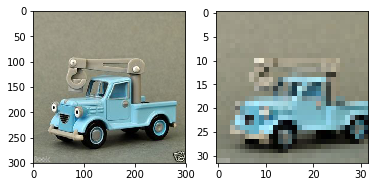

In [156]:
O=cifarise('truck.jpg',lrbt=[0,1,0,0.9])
plt.imshow(O)
plt.show()